# Model Testing

Imports:

In [401]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skmetric
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from funcsigs import signature
import pickle

Get the current working directory:

In [403]:
def get_parent_dir(directory):
    import os
    return os.path.dirname(directory)

current_dirs_parent = get_parent_dir(os.getcwd())
dataraw_dir=current_dirs_parent+"/01.Data/Raw/"
preproc_dir=current_dirs_parent+"/01.Data/Preprocessing/"
models_a_dir=current_dirs_parent+"/03.Models/Set A/"
models_b_dir=current_dirs_parent+"/03.Models/Set B/"

Load preprocessed data:

In [3]:
train_b=pd.read_csv(preproc_dir+"train_b_preproc1.csv")
test_b=pd.read_csv(preproc_dir+"test_b_preproc1.csv")

In [4]:
cols=train_b.columns
selcols=[a for a in cols if a.startswith("x")]

In [5]:
X_train=train_b[train_b.columns.intersection(selcols)].copy()
X_train.fillna(0, inplace=True) 
X_train.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test=test_b[test_b.columns.intersection(selcols)].copy()
X_test.fillna(0, inplace=True) 
X_test.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

y_train=train_b["y_lead2"].copy()
y_test=test_b["y_lead2"].copy()

Train the logistic regression model:

In [6]:
LR1=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR1.fit(X_train,y_train)

C:\Users\jchas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred=LR1.predict(X_test)

In [8]:
min(y_pred), max(y_pred)

(0, 1)

In [9]:
skmetric.f1_score(y_test,y_pred)

0.008771929824561403

In [10]:
skmetric.precision_score(y_test,y_pred)

0.004608294930875576

In [11]:
skmetric.recall_score(y_test,y_pred)

0.09090909090909091

Precision-Recall plot

In [12]:
y_prob=LR1.predict_proba(X_test)

In [13]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob[:,1],pos_label=1)

(0.0, 1.0)

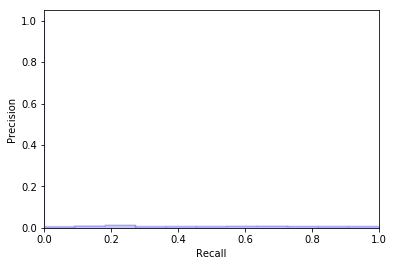

In [14]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [15]:
feature_importance = abs(LR1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

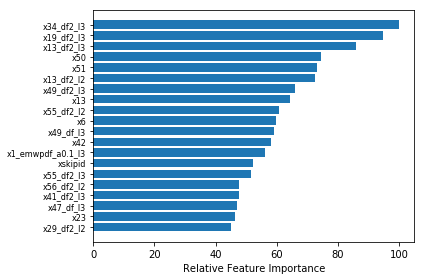

In [16]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Scaling the variables:

In [17]:
scaler= StandardScaler().fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

Additional LR:

In [18]:
LR2=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR2.fit(X_train_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred_sc=LR2.predict(X_test_sc)

In [20]:
min(y_pred_sc), max(y_pred_sc)

(0, 1)

In [21]:
skmetric.f1_score(y_test,y_pred_sc)

0.01694915254237288

In [22]:
skmetric.precision_score(y_test,y_pred_sc)

0.008888888888888889

In [23]:
skmetric.recall_score(y_test,y_pred_sc)

0.18181818181818182

Precision-Recall Plot

In [24]:
y_prob_sc=LR2.predict_proba(X_test_sc)

In [25]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_sc[:,1],pos_label=1)

(0.0, 1.0)

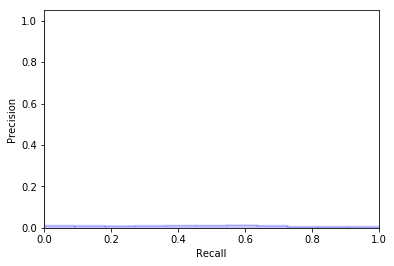

In [26]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [27]:
feature_importance = abs(LR2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

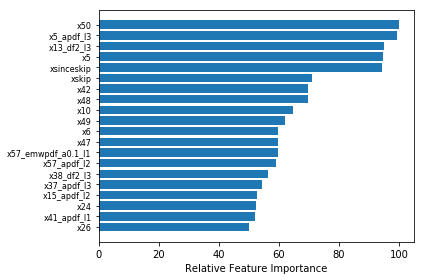

In [28]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Testing only original features:

In [29]:
xoriginal=selcols[:61]

In [30]:
X_train_orig=train_b[train_b.columns.intersection(xoriginal)].copy()
X_train_orig.fillna(0, inplace=True) 
X_train_orig.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test_orig=test_b[test_b.columns.intersection(xoriginal)].copy()
X_test_orig.fillna(0, inplace=True) 
X_test_orig.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

In [31]:
LR3=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR3.fit(X_train_orig,y_train)

C:\Users\jchas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_orig=LR3.predict(X_test_orig)

In [33]:
min(y_pred_orig), max(y_pred_orig)

(0, 1)

In [34]:
skmetric.f1_score(y_test,y_pred_orig)

0.010309278350515464

In [35]:
skmetric.precision_score(y_test,y_pred_orig)

0.005253940455341506

In [36]:
skmetric.recall_score(y_test,y_pred_orig)

0.2727272727272727

In [37]:
y_prob_orig=LR3.predict_proba(X_test_orig)

In [38]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_orig[:,1],pos_label=1)

(0.0, 1.0)

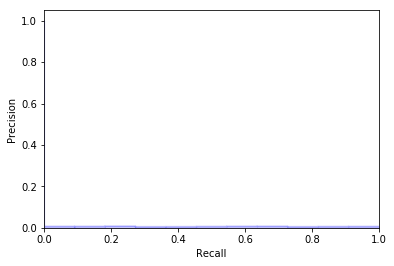

In [39]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [40]:
feature_importance = abs(LR3.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

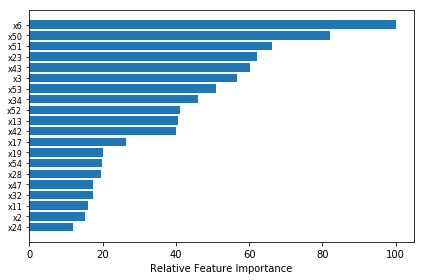

In [41]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Scaling original features:

In [42]:
scaler_orig= StandardScaler().fit(X_train_orig)
X_train_orig_sc=scaler_orig.transform(X_train_orig)
X_test_orig_sc=scaler_orig.transform(X_test_orig)

In [43]:
LR4=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR4.fit(X_train_orig_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_orig_sc=LR4.predict(X_test_orig_sc)

In [45]:
min(y_pred_orig_sc), max(y_pred_orig_sc)

(0, 1)

In [46]:
skmetric.f1_score(y_test,y_pred_orig_sc)

0.013745704467353952

In [47]:
skmetric.precision_score(y_test,y_pred_orig_sc)

0.007142857142857143

In [48]:
skmetric.recall_score(y_test,y_pred_orig_sc)

0.18181818181818182

In [49]:
y_prob_orig_sc=LR4.predict_proba(X_test_orig_sc)

In [50]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_orig_sc[:,1],pos_label=1)

(0.0, 1.0)

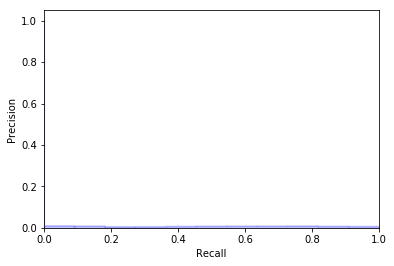

In [51]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [52]:
feature_importance = abs(LR4.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

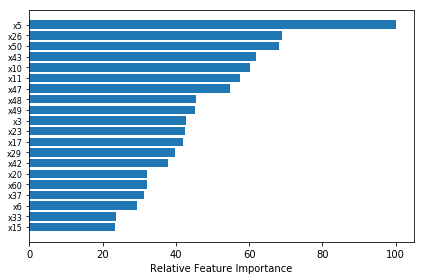

In [53]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Testing only the derived features:

In [54]:
xderived=selcols[61:]

In [55]:
X_train_derived=train_b[train_b.columns.intersection(xderived)].copy()
X_train_derived.fillna(0, inplace=True) 
X_train_derived.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test_derived=test_b[test_b.columns.intersection(xderived)].copy()
X_test_derived.fillna(0, inplace=True) 
X_test_derived.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

In [56]:
LR5=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR5.fit(X_train_derived,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred_derived=LR5.predict(X_test_derived)

In [58]:
min(y_pred_derived), max(y_pred_derived)

(0, 1)

In [59]:
skmetric.f1_score(y_test,y_pred_derived)

0.011513157894736843

In [60]:
skmetric.precision_score(y_test,y_pred_derived)

0.005809128630705394

In [61]:
skmetric.recall_score(y_test,y_pred_derived)

0.6363636363636364

In [62]:
y_prob_derived=LR5.predict_proba(X_test_derived)

In [63]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_derived[:,1],pos_label=1)

(0.0, 1.0)

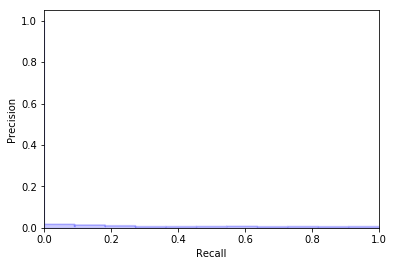

In [64]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [65]:
feature_importance = abs(LR5.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

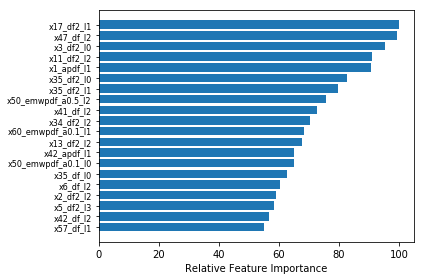

In [66]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Scaling derived features:

In [67]:
scaler_derived= StandardScaler().fit(X_train_derived)
X_train_derived_sc=scaler_derived.transform(X_train_derived)
X_test_derived_sc=scaler_derived.transform(X_test_derived)

In [68]:
LR6=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR6.fit(X_train_derived_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred_derived_sc=LR6.predict(X_test_derived_sc)

In [70]:
min(y_pred_derived_sc), max(y_pred_derived_sc)

(0, 1)

In [71]:
skmetric.f1_score(y_test,y_pred_derived_sc)

0.021276595744680847

In [72]:
skmetric.precision_score(y_test,y_pred_derived_sc)

0.010958904109589041

In [73]:
skmetric.recall_score(y_test,y_pred_derived_sc)

0.36363636363636365

In [74]:
y_prob_derived_sc=LR6.predict_proba(X_test_derived_sc)

In [75]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_derived_sc[:,1],pos_label=1)

(0.0, 1.0)

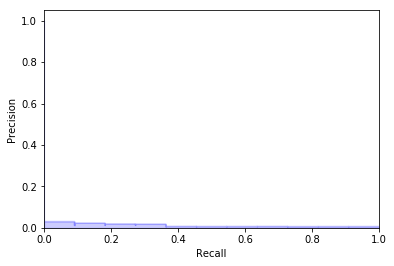

In [76]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [77]:
feature_importance = abs(LR6.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

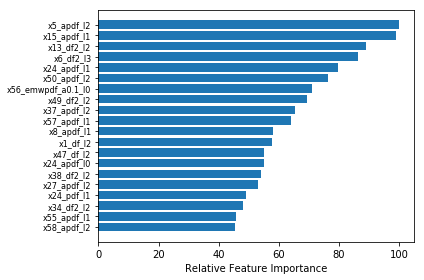

In [78]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Add clustering features:

In [79]:
train_b_cluster=pd.read_csv(preproc_dir+"train_b_cluster.csv")
test_b_cluster=pd.read_csv(preproc_dir+"test_b_cluster.csv")

Test only clustering features:

In [83]:
LR7=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR7.fit(train_b_cluster,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_pred_clust=LR7.predict(test_b_cluster)

In [85]:
min(y_pred_clust), max(y_pred_clust)

(0, 1)

In [238]:
skmetric.f1_score(y_test,y_pred_clust)

0.015056461731493099

In [87]:
skmetric.precision_score(y_test,y_pred_clust)

0.007633587786259542

In [88]:
skmetric.recall_score(y_test,y_pred_clust)

0.5454545454545454

In [89]:
y_prob_clust=LR7.predict_proba(test_b_cluster)

In [90]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_derived_sc[:,1],pos_label=1)

(0.0, 1.0)

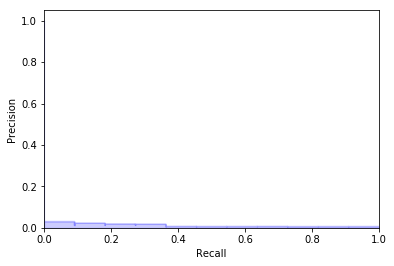

In [91]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [92]:
feature_importance = abs(LR7.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

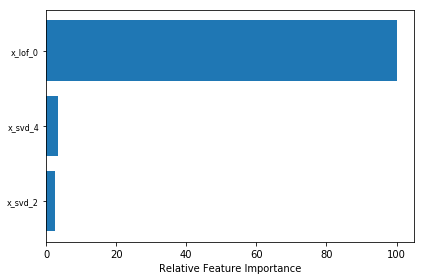

In [94]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(train_b_cluster.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Test clustering+All features:

In [114]:
train_b_addclust=pd.concat([X_train,train_b_cluster],axis=1)
test_b_addclust=pd.concat([X_test,test_b_cluster],axis=1)

In [115]:
cols_addclust=train_b_addclust.columns
selcols_addclust=[a for a in cols if a.startswith("x")]

In [116]:
cols_addclust

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       ...
       'x_pca_4', 'x_svd_0', 'x_svd_1', 'x_svd_2', 'x_svd_3', 'x_svd_4',
       'x_lof_0', 'x_tsne_0', 'x_tsne_1', 'x_tsne_2'],
      dtype='object', length=1782)

In [98]:
LR8=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR8.fit(train_b_addclust,y_train)

C:\Users\jchas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred_addclust=LR8.predict(test_b_addclust)

In [118]:
min(y_pred_addclust), max(y_pred_addclust)

(0, 0)

In [119]:
skmetric.f1_score(y_test,y_pred_addclust)

C:\Users\jchas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

Scaling this set:

In [120]:
scaler_addclust= StandardScaler().fit(train_b_addclust)
X_train_addclust_sc=scaler_addclust.transform(train_b_addclust)
X_test_addclust_sc=scaler_addclust.transform(test_b_addclust)

In [267]:
X_train_addclust_sc.shape

(16558, 1782)

In [121]:
LR9=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR9.fit(X_train_addclust_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
y_pred_addclust_sc=LR9.predict(X_test_addclust_sc)

In [126]:
min(y_pred_addclust_sc), max(y_pred_addclust_sc)

(0, 1)

In [288]:
sum(y_pred_addclust_sc)

252

In [289]:
sum(abs(y_pred_addclust_sc-y_test))

257

In [287]:
skmetric.f1_score(y_test,y_test)

1.0

In [127]:
skmetric.f1_score(y_test,y_pred_addclust_sc)

0.022813688212927757

In [128]:
skmetric.precision_score(y_test,y_pred_addclust_sc)

0.011904761904761904

In [129]:
skmetric.recall_score(y_test,y_pred_addclust_sc)

0.2727272727272727

In [130]:
y_prob_addclust_sc=LR9.predict_proba(X_test_addclust_sc)

In [131]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_addclust_sc[:,1],pos_label=1)

(0.0, 1.0)

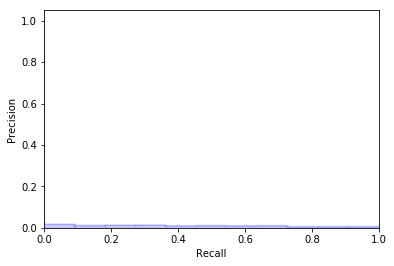

In [132]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [133]:
feature_importance = abs(LR9.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

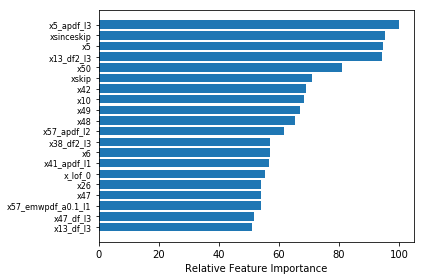

In [136]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(train_b_addclust.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

In [404]:
pickle.dump(LR9, open(models_b_dir+"LR9.pickle.dat", "wb"))

Add output from XGB

In [416]:
xgb_train_b=pd.read_csv(preproc_dir+"xgb_out_train_b_own.csv")
xgb_test_b=pd.read_csv(preproc_dir+"xgb_out_test_b_own.csv")

In [417]:
def logisticf(x):
    p=1/(1+np.exp(x))
    return p

logisticf(-0.167528)

0.5417843204057448

In [418]:
xgb_train_b_prob=logisticf(xgb_train_b)
xgb_test_b_prob=logisticf(xgb_test_b)

xgb_train_b_prob=xgb_train_b_prob.add_suffix("_prob")
xgb_test_b_prob=xgb_test_b_prob.add_suffix("_prob")

,xgb_y_prob_prob,xgb_ylead1_prob_prob,xgb_yblead2_prob_prob
0,0.502119,0.501556,0.500966
1,0.502119,0.501134,0.500966
2,0.500198,0.485159,0.500229
3,0.473901,0.475266,0.497594
4,0.473901,0.473767,0.502434
...,...,...,...
16553,0.503468,0.508318,0.499647
16554,0.500216,0.505268,0.499647
16555,0.487032,0.505343,0.499647
16556,0.488716,0.503990,0.499647


Check performance by itself

In [351]:
LR10=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR10.fit(pd.concat([xgb_train_b,xgb_train_b_prob],axis=1),y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [352]:
y_pred_xgb=LR10.predict(pd.concat([xgb_test_b,xgb_test_b_prob],axis=1))

In [353]:
min(y_pred_xgb), max(y_pred_xgb)

(0, 1)

In [357]:
skmetric.f1_score(y_test,y_pred_xgb)

0.010230179028132993

In [358]:
skmetric.precision_score(y_test,y_pred_xgb)

0.005263157894736842

In [359]:
skmetric.recall_score(y_test,y_pred_xgb)

0.18181818181818182

In [360]:
y_prob_xgb=LR10.predict_proba(pd.concat([xgb_test_b,xgb_test_b_prob],axis=1))

In [361]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_xgb[:,1],pos_label=1)

(0.0, 1.0)

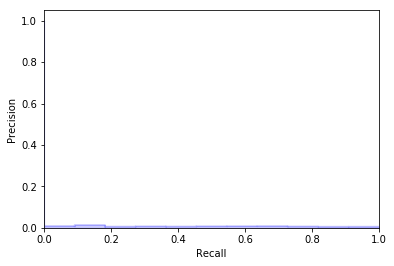

In [362]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [363]:
feature_importance = abs(LR10.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

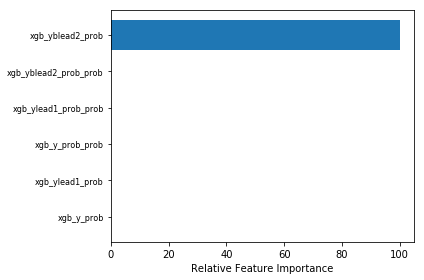

In [364]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array((pd.concat([xgb_train_b,xgb_train_b_prob],axis=1)).columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Adding probs to addclust:

In [365]:
X_train_addclust_addprob_sc=np.concatenate([X_train_addclust_sc,xgb_train_b,xgb_train_b_prob],axis=1)
X_test_addclust_addprob_sc=np.concatenate([X_test_addclust_sc,xgb_test_b,xgb_test_b_prob],axis=1)

In [366]:
pd.DataFrame(X_train_addclust_addprob_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787
0,0.449511,-0.958492,-0.806094,0.241215,-0.184303,-0.544205,-0.100582,-0.83792,-0.368877,-0.324346,...,0.319306,-0.084966,0.087245,-1.557961,-0.008477,-0.006223,-0.003866,0.502119,0.501556,0.500966
1,0.594406,-0.947138,-0.792889,0.261642,-0.199306,-0.492327,-0.100582,-0.83792,-0.368877,-0.324346,...,-3.131788,-0.238830,0.169126,-1.358950,-0.008477,-0.004536,-0.003866,0.502119,0.501134,0.500966
2,0.430762,-0.976377,-0.850007,0.245926,-0.214308,-0.467323,-0.004758,-0.83792,-0.169231,-0.139113,...,0.319306,0.065805,0.180325,-1.649667,-0.000793,0.059381,-0.000915,0.500198,0.485159,0.500229
3,0.339693,-0.992700,-0.793785,0.238703,-0.228708,-0.485801,-0.087804,-0.83792,-0.102007,-0.045063,...,-3.131788,-0.357424,-0.192885,-2.221694,0.104490,0.099018,0.009626,0.473901,0.475266,0.497594
4,0.287016,-0.990804,-0.846595,0.254442,-0.239573,-0.458349,-0.100582,-0.83792,-0.169231,-0.045063,...,-3.131788,-0.357361,-0.192818,-2.221601,0.104490,0.105028,-0.009736,0.473901,0.473767,0.502434


In [367]:
colnames=pd.concat([train_b_addclust,xgb_train_b,xgb_train_b_prob],axis=1).columns

In [368]:
len(colnames)

1788

In [369]:
X_train_addclust_sc.shape

(16558, 1782)

In [370]:
LR11=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR11.fit(X=X_train_addclust_addprob_sc,y=y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [371]:
y_pred_xgb_addclust=LR11.predict(X_test_addclust_addprob_sc)

In [372]:
min(y_pred_xgb_addclust), max(y_pred_xgb_addclust)

(0, 1)

In [373]:
np.count_nonzero(~np.isnan(y_pred_xgb_addclust))

1840

In [374]:
y_pred_addclust_sc

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [375]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1835    0
1836    0
1837    0
1838    0
1839    0
Name: y_lead2, Length: 1840, dtype: int64

In [376]:
skmetric.f1_score(y_test,y_pred_xgb_addclust)

0.02222222222222222

In [377]:
sum(y_test)

11

In [378]:
sum(y_pred_xgb_addclust)

169

In [379]:
sum(abs(y_pred_xgb_addclust-y_test))

176

In [380]:
pd.DataFrame(y_test).to_csv(preproc_dir+"y_test.csv",index=False)
pd.DataFrame(y_pred_xgb_addclust).to_csv(preproc_dir+"y_pred_xgb_addclust.csv",index=False)

In [381]:
skmetric.precision_score(y_test,y_pred_xgb_addclust)

0.011834319526627219

In [382]:
skmetric.recall_score(y_test,y_pred_xgb_addclust)

0.18181818181818182

In [345]:
y_prob_xgb_addclust=LR11.predict_proba(X_test_addclust_addprob_sc)

In [346]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_xgb_addclust[:,1],pos_label=1)

(0.0, 1.0)

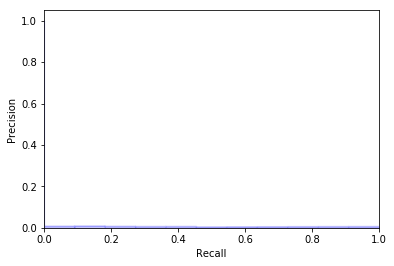

In [347]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [330]:
feature_importance = abs(LR11.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

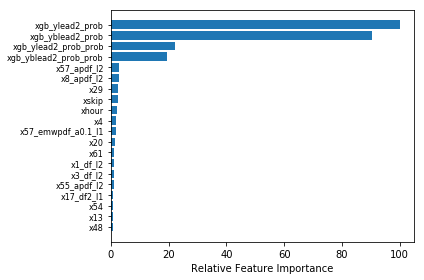

In [331]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(colnames)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

In [405]:
pickle.dump(LR11, open(models_b_dir+"LR11.pickle.dat", "wb"))

Use the scale-derive-fit pipeline:

In [383]:
train_b_2=pd.read_csv(preproc_dir+"train_b_preproc_sc.csv")
test_b_2=pd.read_csv(preproc_dir+"test_b_preproc_sc.csv")

In [384]:
cols_2=train_b_2.columns
selcols_2=[a for a in cols_2 if a.startswith("x")]

In [385]:
X_train_2=train_b_2[train_b_2.columns.intersection(selcols_2)].copy()
X_train_2.fillna(0, inplace=True) 
X_train_2.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test_2=test_b_2[test_b_2.columns.intersection(selcols_2)].copy()
X_test_2.fillna(0, inplace=True) 
X_test_2.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

y_train_2=train_b_2["y_lead2"].copy()
y_test_2=test_b_2["y_lead2"].copy()

Train the logistic regression model:

In [386]:
LR12=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR12.fit(X_train_2,y_train_2)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [395]:
y_pred_2=LR12.predict(X_test_2)

In [396]:
min(y_pred_2), max(y_pred_2)

(0, 1)

In [397]:
skmetric.f1_score(y_test,y_pred_2)

0.0

In [398]:
sum(y_pred_2)

34

In [399]:
sum(abs(y_pred_2-y_test))

45

In [406]:
pickle.dump(LR12, open(models_b_dir+"LR12.pickle.dat", "wb"))

Add moving average on the probabilities from XGB:

In [415]:
def EMW_prob_lagdif_xi_n(df,n_list=[1,2,3],alpha_list=[0.25,0.5,0.75]):
    dfout=df.copy()
    i_list=dfout.columns
    for a in alpha_list:    
        for i in i_list:
            dfout[str(i)+"_emwpdf_a"+str(a)]=dfout[i].ewm(alpha=a).mean()            
    return(dfout)

In [457]:
xgb_train_b_emw=EMW_prob_lagdif_xi_n(xgb_train_b,alpha_list=[0.1,0.5,0.95])
xgb_train_b_prob_emw=EMW_prob_lagdif_xi_n(xgb_train_b_prob,alpha_list=[0.1,0.5,0.95])

xgb_test_b_emw=EMW_prob_lagdif_xi_n(xgb_test_b,alpha_list=[0.1,0.5,0.95])
xgb_test_b_prob_emw=EMW_prob_lagdif_xi_n(xgb_test_b_prob,alpha_list=[0.1,0.5,0.95])

In [459]:
xgb_train_b_prob_emw.head()

,xgb_y_prob_prob,xgb_ylead1_prob_prob,xgb_yblead2_prob_prob,xgb_y_prob_prob_emwpdf_a0.1,xgb_ylead1_prob_prob_emwpdf_a0.1,xgb_yblead2_prob_prob_emwpdf_a0.1,xgb_y_prob_prob_emwpdf_a0.5,xgb_ylead1_prob_prob_emwpdf_a0.5,xgb_yblead2_prob_prob_emwpdf_a0.5,xgb_y_prob_prob_emwpdf_a0.95,xgb_ylead1_prob_prob_emwpdf_a0.95,xgb_yblead2_prob_prob_emwpdf_a0.95
0,0.502119,0.501556,0.500966,0.502119,0.501556,0.500966,0.502119,0.501556,0.500966,0.502119,0.501556,0.500966
1,0.502119,0.501134,0.500966,0.502119,0.501334,0.500966,0.502119,0.501275,0.500966,0.502119,0.501154,0.500966
2,0.500198,0.485159,0.500229,0.501410,0.495365,0.500694,0.501022,0.492066,0.500545,0.500294,0.485957,0.500265
3,0.473901,0.475266,0.497594,0.493411,0.489521,0.499793,0.486557,0.483106,0.498971,0.475221,0.475800,0.497727
4,0.473901,0.473767,0.502434,0.488647,0.485674,0.500438,0.480025,0.478286,0.500758,0.473967,0.473869,0.502199


In [460]:
xgb_train_b_emw.head()

,xgb_y_prob,xgb_ylead1_prob,xgb_yblead2_prob,xgb_y_prob_emwpdf_a0.1,xgb_ylead1_prob_emwpdf_a0.1,xgb_yblead2_prob_emwpdf_a0.1,xgb_y_prob_emwpdf_a0.5,xgb_ylead1_prob_emwpdf_a0.5,xgb_yblead2_prob_emwpdf_a0.5,xgb_y_prob_emwpdf_a0.95,xgb_ylead1_prob_emwpdf_a0.95,xgb_yblead2_prob_emwpdf_a0.95
0,-0.008477,-0.006223,-0.003866,-0.008477,-0.006223,-0.003866,-0.008477,-0.006223,-0.003866,-0.008477,-0.006223,-0.003866
1,-0.008477,-0.004536,-0.003866,-0.008477,-0.005335,-0.003866,-0.008477,-0.005099,-0.003866,-0.008477,-0.004617,-0.003866
2,-0.000793,0.059381,-0.000915,-0.005641,0.018545,-0.002777,-0.004086,0.031747,-0.002179,-0.001176,0.056189,-0.001062
3,0.104490,0.099018,0.009626,0.026383,0.041945,0.000830,0.053821,0.067625,0.004117,0.099207,0.096877,0.009091
4,0.104490,0.105028,-0.009736,0.045456,0.057350,-0.001750,0.079973,0.086929,-0.003033,0.104225,0.104620,-0.008795


In [461]:
X_train_sc_df=pd.DataFrame(columns=X_train.columns,data=X_train_sc)
X_test_sc_df=pd.DataFrame(columns=X_test.columns,data=X_test_sc)

In [462]:
X_train_sc_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x60_df2_l3,x61_df2_l3,xminute,xhour,xday,xmonth,xtimedif,xskip,xskipid,xsinceskip
0,0.449511,-0.958492,-0.806094,0.241215,-0.184303,-0.544205,-0.100582,-0.83792,-0.368877,-0.324346,...,0.000002,0.0,-1.680658,-1.615914,-1.659404,0.0,-0.028983,-0.077161,-1.774221,-1.187332
1,0.594406,-0.947138,-0.792889,0.261642,-0.199306,-0.492327,-0.100582,-0.83792,-0.368877,-0.324346,...,0.000002,0.0,-1.564927,-1.615914,-1.659404,0.0,-0.028983,-0.077161,-1.774221,-1.181664
2,0.430762,-0.976377,-0.850007,0.245926,-0.214308,-0.467323,-0.004758,-0.83792,-0.169231,-0.139113,...,0.000002,0.0,-1.449196,-1.615914,-1.659404,0.0,-0.028983,-0.077161,-1.774221,-1.175996
3,0.339693,-0.992700,-0.793785,0.238703,-0.228708,-0.485801,-0.087804,-0.83792,-0.102007,-0.045063,...,0.000002,0.0,-1.333465,-1.615914,-1.659404,0.0,-0.028983,-0.077161,-1.774221,-1.170329
4,0.287016,-0.990804,-0.846595,0.254442,-0.239573,-0.458349,-0.100582,-0.83792,-0.169231,-0.045063,...,0.000002,0.0,-1.217734,-1.615914,-1.659404,0.0,-0.028983,-0.077161,-1.774221,-1.164661


In [463]:
X_test_sc_df.shape

(1840, 1765)

In [464]:
test_b_cluster.shape

(1840, 17)

In [465]:
xgb_test_b_emw.shape

(1840, 12)

In [466]:
train_b_cluster.head()

,x_svdd_0,x_db_0,x_iso_0,x_pca_0,x_pca_1,x_pca_2,x_pca_3,x_pca_4,x_svd_0,x_svd_1,x_svd_2,x_svd_3,x_svd_4,x_lof_0,x_tsne_0,x_tsne_1,x_tsne_2
0,1,-1,1,-0.686867,-0.811409,-0.410102,-0.043960,-0.413310,-0.686866,-0.811395,-0.410091,-0.042648,-0.416869,1,-1.496916,1.367181,-23.990810
1,-1,-1,1,-0.657539,-0.444951,-0.356121,0.119632,-0.467611,-0.657538,-0.444923,-0.355922,0.121178,-0.469383,-1,-4.168827,2.655357,-20.939829
2,-1,-1,1,-0.636332,-1.276798,-1.010448,-0.285822,-0.599342,-0.636330,-1.276774,-1.010442,-0.284012,-0.604762,1,1.121307,2.831553,-25.396730
3,-1,-1,1,-0.582869,-2.035815,-0.831341,0.170509,0.953705,-0.582867,-2.035824,-0.831735,0.171392,0.948596,-1,-6.228264,-3.039969,-34.166313
4,-1,-1,1,-0.850604,-1.820071,-0.320338,0.000410,0.015128,-0.850603,-1.820051,-0.320337,0.002198,0.012070,-1,-6.227168,-3.038906,-34.164886


In [480]:
final_b_train=pd.concat([X_train_sc_df,train_b_cluster,xgb_train_b_emw,xgb_train_b_prob_emw],axis=1)
final_b_test=pd.concat([X_test_sc_df,test_b_cluster,xgb_test_b_emw,xgb_test_b_prob_emw],axis=1,ignore_index=True)

In [481]:
final_b_train.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,xgb_yblead2_prob_prob,xgb_y_prob_prob_emwpdf_a0.1,xgb_ylead1_prob_prob_emwpdf_a0.1,xgb_yblead2_prob_prob_emwpdf_a0.1,xgb_y_prob_prob_emwpdf_a0.5,xgb_ylead1_prob_prob_emwpdf_a0.5,xgb_yblead2_prob_prob_emwpdf_a0.5,xgb_y_prob_prob_emwpdf_a0.95,xgb_ylead1_prob_prob_emwpdf_a0.95,xgb_yblead2_prob_prob_emwpdf_a0.95
16553,-0.059516,0.079529,-0.116580,0.361886,0.119158,1.256387,-1.717993,0.356684,-0.368877,0.048978,...,0.499647,0.501686,0.503335,0.498811,0.503008,0.505626,0.499575,0.503490,0.508036,0.499647
16554,-0.156089,0.128671,-0.121695,0.366648,0.141211,1.248525,-1.717993,0.486298,-0.368877,0.042908,...,0.499647,0.501539,0.503529,0.498895,0.501612,0.505447,0.499611,0.500379,0.505406,0.499647
16555,-0.083366,0.096420,-0.125600,0.371411,0.163241,1.284853,-1.717993,0.486298,-0.368877,-0.045063,...,0.499647,0.500088,0.503710,0.498970,0.494322,0.505395,0.499629,0.487699,0.505346,0.499647
16556,-0.208939,0.096209,-0.104038,0.361599,0.185293,1.233937,-1.622169,0.486298,-0.368877,-0.045063,...,0.499647,0.498951,0.503738,0.499038,0.491519,0.504693,0.499638,0.488665,0.504058,0.499647
16557,-0.175635,0.129827,-0.125600,0.391109,0.207322,1.246716,-1.622169,0.486298,-0.368877,-0.045063,...,0.499647,0.497894,0.503492,0.499099,0.489953,0.502983,0.499642,0.488401,0.501412,0.499647


In [468]:
final_b_test.shape

(1840, 1806)

In [483]:
def cust_dummies(df,varlist=["xmonth","xhour",
                             "xminute","x28","x61",
                             "x_svdd_0","x_db_0",
                             "x_iso_0","x_lof_0","xskip"]):
    dfout=df.copy()
    for var in varlist:
        dfout=pd.concat([dfout,pd.get_dummies(dfout[var],prefix=var)],axis=1)
    return(dfout)

In [443]:
LR13=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR13.fit(final_b_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [469]:
y_pred_final=LR13.predict(final_b_test)

In [470]:
min(y_pred_final), max(y_pred_final)

(0, 1)

In [471]:
skmetric.f1_score(y_test,y_pred_final)

0.024242424242424246

In [472]:
sum(y_pred_final)

154

In [473]:
sum(abs(y_pred_final-y_test))

161

In [474]:
pickle.dump(LR13, open(models_b_dir+"LR13.pickle.dat", "wb"))

In [485]:
skmetric.precision_score(y_test,y_pred_final)

0.012987012987012988

In [486]:
skmetric.recall_score(y_test,y_pred_final)

0.18181818181818182

In [488]:
y_prob_final=LR13.predict_proba(final_b_test)

In [489]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_final[:,1],pos_label=1)

(0.0, 1.0)

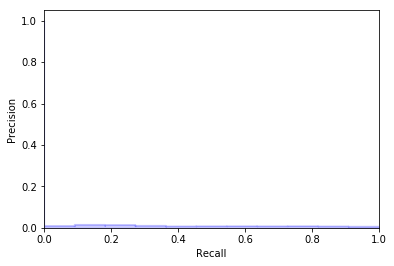

In [490]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [491]:
feature_importance = abs(LR13.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

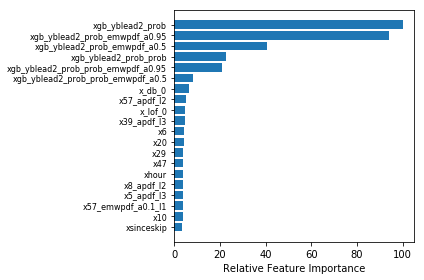

In [493]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(final_b_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()